In [ ]:
!pip install -U -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutosh8808","key":"02c2eb86734fb020c25e17c0650e5628"}'}

In [ ]:

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen

100% 3.51G/3.51G [00:34<00:00, 122MB/s]
100% 3.51G/3.51G [00:34<00:00, 108MB/s]


In [ ]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/tuberculosis-chest-xrays-shenzhen.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
! pip install split-folders

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import splitfolders
from glob import glob

In [ ]:
datainfo = pd.read_csv('/content/shenzhen_metadata.csv')

In [ ]:
datainfo.head()

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal


In [ ]:
normal = []
positive =  []


In [ ]:
def extract_target(x):
  for i in range(len(x['study_id'])):
    if x['findings'][i] == 'normal':
      normal.append(x['study_id'][i])
    else:
      positive.append(x['study_id'][i])

In [ ]:
extract_target(datainfo)

In [ ]:
len(normal)


326

In [ ]:

len(positive)

336

In [ ]:
!mkdir data

In [ ]:
!mkdir data/normal
!mkdir data/positive

In [ ]:
for i in range(len(normal)):
  path = '/content/images/images/' + normal[i]
  !mv $path /content/data/normal


In [ ]:
for i in range(len(positive)):
  path = '/content/images/images/' + positive[i]
  !mv $path /content/data/positive

In [ ]:
input_folder = "/content/data"
output = "/content/dataset" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .0, 0.2)) # ratio of split are in order of train/val/tes

Copying files: 662 files [00:21, 30.82 files/s]


In [ ]:
tuberculosis  = glob('/content/dataset/test/positive/*.png')
normal = glob('/content/dataset/test/normal/*.png')

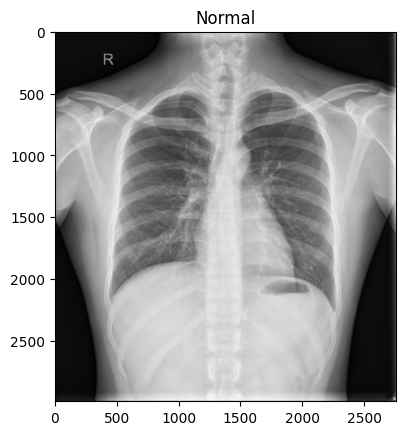

In [ ]:
plt.title('Normal')
plt.imshow(image.load_img(np.random.choice(normal)))
plt.show()


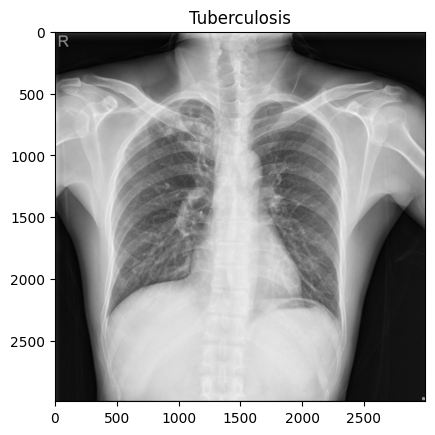

In [ ]:
plt.title('Tuberculosis')
plt.imshow(image.load_img(np.random.choice(tuberculosis)))
plt.show()

In [ ]:

img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data_gen = datagen.flow_from_directory(directory='/content/dataset/train',
                                             target_size = (img_width, img_height),
                                             class_mode = 'sparse')
test_data_gen = datagen.flow_from_directory(directory='/content/dataset/test',
                                            target_size = (img_width, img_height),
                                             class_mode = 'sparse',)

Found 528 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [ ]:
model = Sequential()

#convolution
model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

#Dense
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(228, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(270, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(1, activation='sigmoid'))

In [ ]:

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit_generator(generator=train_data_gen,
                              steps_per_epoch=len(train_data_gen),
                              epochs=20,
                              validation_data= test_data_gen,
                              validation_steps = len(test_data_gen))

<ipython-input-27-6f25fa214ba6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(generator=train_data_gen,


Epoch 1/20
17/17 [==============================] - 83s 4s/step - loss: 0.7071 - accuracy: 0.5095 - val_loss: 0.6931 - val_accuracy: 0.4925
Epoch 2/20
17/17 [==============================] - 69s 4s/step - loss: 0.6776 - accuracy: 0.5170 - val_loss: 0.5706 - val_accuracy: 0.7985
Epoch 3/20
17/17 [==============================] - 57s 3s/step - loss: 0.5729 - accuracy: 0.7481 - val_loss: 0.4879 - val_accuracy: 0.8060
Epoch 4/20
17/17 [==============================] - 56s 3s/step - loss: 0.4940 - accuracy: 0.8163 - val_loss: 0.4753 - val_accuracy: 0.8134
Epoch 5/20
17/17 [==============================] - 57s 3s/step - loss: 0.4662 - accuracy: 0.8068 - val_loss: 0.5142 - val_accuracy: 0.8134
Epoch 6/20
17/17 [==============================] - 56s 3s/step - loss: 0.4336 - accuracy: 0.8314 - val_loss: 0.4473 - val_accuracy: 0.8134
Epoch 7/20
17/17 [==============================] - 55s 3s/step - loss: 0.4161 - accuracy: 0.8258 - val_loss: 0.4365 - val_accuracy: 0.8134
Epoch 8/20
17/17 [==

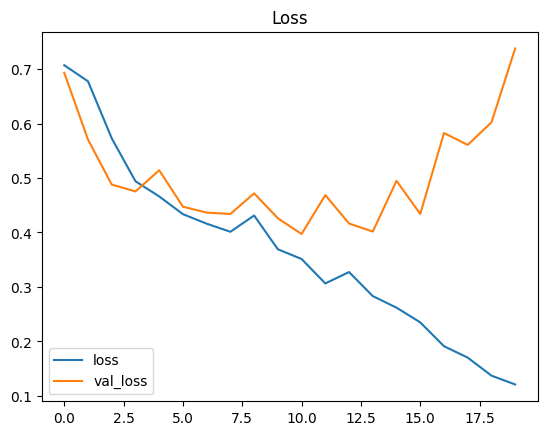

In [ ]:
plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

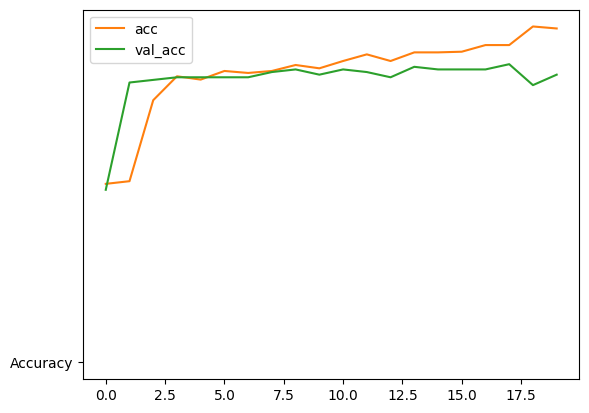

In [ ]:
plt.plot('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [ ]:
model.save('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data_gen)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test data
predictions = model.predict(test_data_gen)

5/5 [==============================] - 11s 2s/step - loss: 0.7378 - accuracy: 0.8209
Test Accuracy: 0.8208954930305481
5/5 [==============================] - 11s 2s/step


In [ ]:
# Convert the predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Get the true labels from the test data generator
true_labels = test_data_gen.classes

# Create a confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mtx)

# Print a classification report
class_names = ['Normal', 'Tuberculosis']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(classification_rep)


Confusion Matrix:
[[32 34]
 [32 36]]
Classification Report:
              precision    recall  f1-score   support

      Normal       0.50      0.48      0.49        66
Tuberculosis       0.51      0.53      0.52        68

    accuracy                           0.51       134
   macro avg       0.51      0.51      0.51       134
weighted avg       0.51      0.51      0.51       134

